<a href="https://colab.research.google.com/github/vishshukla1234/Deep-Learning/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   -------- ------------------------------- 1/5 [tqdm]
   ------------------------ --------------- 3/5 [protobuf]
   ------------------------ --------------- 3/5 [protobuf]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   ---------------------------------------- 5/5 [kaggle]

Note: you may need to restart the kernel to use updated packages.


In [2]:
#configuring the path of Kaglle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


### Import Face Mask Dataset

In [3]:
# api to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\prati\AppData\Local\Programs\Python\Python313\Scripts\kaggle.exe\__main__.py", line 7, in <module>
    sys.exit(main())
             ~~~~^^
  File "c:\Users\prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\kaggle\cli.py", line 68, in main
    out = args.func(**command_args)
  File "c:\Users\prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [4]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

FileNotFoundError: [Errno 2] No such file or directory: '/content/face-mask-dataset.zip'

###Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3514.jpg', 'with_mask_2408.jpg', 'with_mask_3074.jpg', 'with_mask_102.jpg', 'with_mask_305.jpg']
['with_mask_909.jpg', 'with_mask_101.jpg', 'with_mask_817.jpg', 'with_mask_1914.jpg', 'with_mask_1505.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2279.jpg', 'without_mask_469.jpg', 'without_mask_2503.jpg', 'without_mask_1301.jpg', 'without_mask_3333.jpg']
['without_mask_206.jpg', 'without_mask_503.jpg', 'without_mask_2210.jpg', 'without_mask_1379.jpg', 'without_mask_1562.jpg']


### Creating Labels for the 2 class of images

#### 0 -> No_Mask 1 -> With_Mask

In [ ]:
print("mask: ", len(with_mask_files))
print("no mask: ", len(without_mask_files))

mask:  3725
no mask:  3828


In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
labels = with_mask_labels+without_mask_labels

Displaying the images

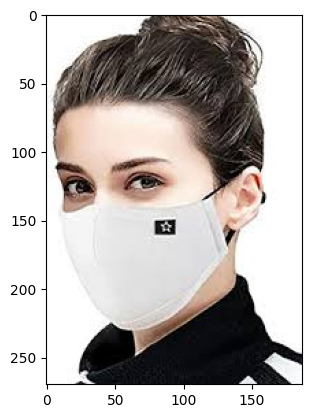

In [ ]:
# displaying with mask img
img = mpimg.imread('/content/data/with_mask/with_mask_2089.jpg')
imgplot = plt.imshow(img)
plt.show()

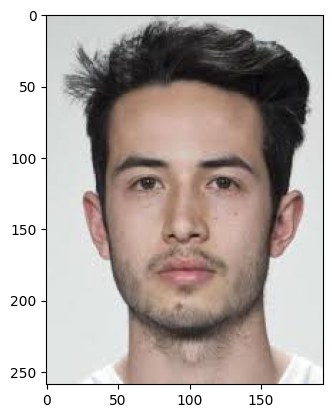

In [ ]:
# displaying without mask img
img = mpimg.imread('/content/data/without_mask/without_mask_2089.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the img
2. Convert the img to numpy arr

In [ ]:
#covert img to numpy arr
with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  data.append(np.array(image))


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  data.append(np.array(image))

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 54,  62,  75],
        [ 54,  62,  75],
        [ 53,  61,  74],
        ...,
        [ 71,  83, 102],
        [ 71,  82, 102],
        [ 70,  81, 101]],

       [[ 52,  60,  73],
        [ 53,  61,  74],
        [ 52,  60,  73],
        ...,
        [ 71,  84, 103],
        [ 71,  83, 103],
        [ 70,  82, 101]],

       [[ 51,  59,  71],
        [ 53,  61,  73],
        [ 52,  60,  72],
        ...,
        [ 71,  85, 104],
        [ 71,  85, 104],
        [ 70,  84, 103]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
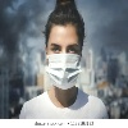

In [ ]:
data[9]

In [ ]:
type(data[0])
data[0].shape

(128, 128, 3)

In [ ]:
# converting img list and label list into numpy array

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


In [ ]:
#Feature Scaling
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.3372549 , 0.3372549 , 0.34509804],
        [0.        , 0.        , 0.00392157],
        [0.01960784, 0

Building CNN

In [ ]:
import tensorflow as tf

In [ ]:
num_of_classes = 2

model= tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the NN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
#training NN
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - acc: 0.7023 - loss: 0.6838 - val_acc: 0.9107 - val_loss: 0.2467
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8819 - loss: 0.3095 - val_acc: 0.9174 - val_loss: 0.2061
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8917 - loss: 0.2599 - val_acc: 0.9256 - val_loss: 0.1748
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9118 - loss: 0.2201 - val_acc: 0.9322 - val_loss: 0.1729
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9320 - loss: 0.1734 - val_acc: 0.9488 - val_loss: 0.1452
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9395 - loss: 0.1493 - val_acc: 0.9339 - val_loss: 0.1700
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9504 - loss: 0.1308 - val_acc: 0.9372 - val_loss: 0.1393
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9571 - loss: 0.1112 - val_acc: 0.9438 - val_loss: 0.1397
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms

Model Evaluation


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9116 - loss: 0.2852
Test Accuracy = 0.9080079197883606


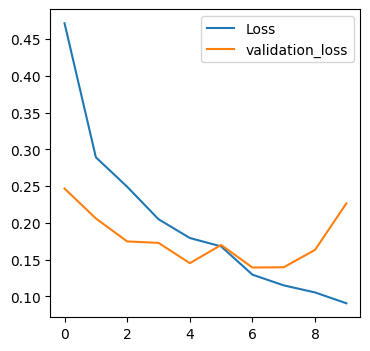

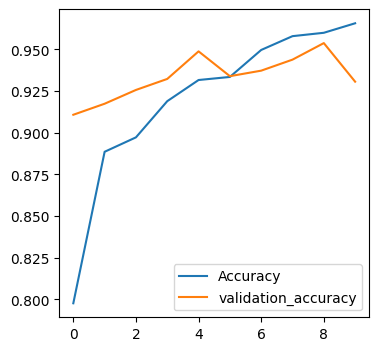

In [ ]:
h = history
#plotting the loass and accuracy graph

plt.figure(figsize=(4, 4))
plt.plot(h.history['loss'], label='Loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

plt.figure(figsize=(4, 4))
plt.plot(h.history['acc'], label='Accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()

Predictive System

Path of the img to be predicted: /content/images.jpg


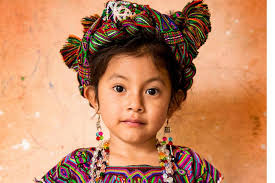

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.0908105  0.96380323]]
1
The person in the image is not wearing mask


In [ ]:
input_img_path=input('Path of the img to be predicted: ')

input_img=cv2.imread(input_img_path)

#displaying the img
cv2_imshow(input_img)

input_img_resize=cv2.resize(input_img,(128,128))

input_img_scaled=input_img_resize/255

input_img_reshape=np.reshape(input_img_scaled, [1,128,128,3])

input_prediction=model.predict(input_img_reshape)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==0:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')